## Temperaturas Globales a  lo largo de los años

**En este dataset analizamos 5 archivos csv:**


🌍`country` : cuenta con los registros de temperaturas por pais desde Enero del año 1743 hasta Enero del 2013

🗽`major_city` : cuenta con los registros de temperaturas de las distintas "Ciudades Grandes" del mundo con info desde Enero del año 1849 hasta Enero del 2013

🛩`state` : cuenta con los registros de temperaturas por estados de diferentes paises desde Enero del año 1855 hasta Enero del 2015

🌊`global_temperatures` : cuenta con los registros de temperaturas globales de la tierra, teniendo columnas como Land Temperature y Ocean Temperature, desde Enero del año 1750 hasta Enero del 2015

🗺`city` : cuenta con los registros de temperaturas por ciudades desde Enero del año 1743 hasta Enero del 2013



En todos tenemos la temperatura promedio y la incertidumbre de la temperatura promedio
En el de `global_temperatures` tambien contamos con el minimo y maximo de la temperatura de la tierra y oceano.





## ¿Qué buscamos con este análisis?

HIPOTESIS

# Indice: organizacion y estructura del Notebook

1. 
2. 
3. 
4. 

## Craga de librerias y archivos

In [214]:
#Importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py

In [215]:
path = 'data/'
all_files = glob.glob(path+"/*.csv")
all_files

['data/GlobalLandTemperaturesByCountry.csv',
 'data/GlobalLandTemperaturesByMajorCity.csv',
 'data/GlobalLandTemperaturesByState.csv',
 'data/GlobalLandTemperaturesByGlobalTemperatures.csv',
 'data/archive.csv',
 'data/GlobalLandTemperaturesByCity.csv']

In [216]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [217]:
from f.load_data import load_all_data

In [218]:
data = load_all_data('data/')

In [219]:
data.keys() #mi data ahora es un diccionario que ahora tiene como clave valor los datasets

dict_keys(['Country', 'MajorCity', 'State', 'GlobalTemperatures', 'archive', 'City'])

## dataset extra: emisión co2

In [220]:
path_file_co2 = "data/archive.csv"

In [221]:
co2 = pd.read_csv(path_file_co2)
co2.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06


## Country 

In [222]:
#Analisis del primer dataset
country = data['Country'].copy()
country.head()

,index,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,0,1743-11-01,4.384,2.294,Åland
1,1,1743-12-01,NaN,NaN,Åland
2,2,1744-01-01,NaN,NaN,Åland
3,3,1744-02-01,NaN,NaN,Åland
4,4,1744-03-01,NaN,NaN,Åland


In [223]:
np.unique(country['Country'])

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo',
       'Congo (Democratic Republic Of The)', 'Costa Rica', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', "Côte D'Ivoire",
       'Denmark', 'Denmark (Europe)', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'E

## Major City 

In [224]:
major_city = data['MajorCity'].copy()
major_city.head()

,index,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [225]:
np.unique(major_city['City'])

array(['Abidjan', 'Addis Abeba', 'Ahmadabad', 'Aleppo', 'Alexandria',
       'Ankara', 'Baghdad', 'Bangalore', 'Bangkok', 'Belo Horizonte',
       'Berlin', 'Bogotá', 'Bombay', 'Brasília', 'Cairo', 'Calcutta',
       'Cali', 'Cape Town', 'Casablanca', 'Changchun', 'Chengdu',
       'Chicago', 'Chongqing', 'Dakar', 'Dalian', 'Dar Es Salaam',
       'Delhi', 'Dhaka', 'Durban', 'Faisalabad', 'Fortaleza', 'Gizeh',
       'Guangzhou', 'Harare', 'Harbin', 'Ho Chi Minh City', 'Hyderabad',
       'Ibadan', 'Istanbul', 'Izmir', 'Jaipur', 'Jakarta', 'Jiddah',
       'Jinan', 'Kabul', 'Kano', 'Kanpur', 'Karachi', 'Kiev', 'Kinshasa',
       'Lagos', 'Lahore', 'Lakhnau', 'Lima', 'London', 'Los Angeles',
       'Luanda', 'Madras', 'Madrid', 'Manila', 'Mashhad', 'Melbourne',
       'Mexico', 'Mogadishu', 'Montreal', 'Moscow', 'Nagoya', 'Nagpur',
       'Nairobi', 'Nanjing', 'New Delhi', 'New York', 'Paris', 'Peking',
       'Pune', 'Rangoon', 'Rio De Janeiro', 'Riyadh', 'Rome',
       'Saint Petersbu

## State

In [226]:
state = data['State'].copy()
state.head()

,index,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,0,1855-05-01,25.544,1.171,Acre,Brazil
1,1,1855-06-01,24.228,1.103,Acre,Brazil
2,2,1855-07-01,24.371,1.044,Acre,Brazil
3,3,1855-08-01,25.427,1.073,Acre,Brazil
4,4,1855-09-01,25.675,1.014,Acre,Brazil


## Global Temperatures

In [227]:
global_temperatures = data['GlobalTemperatures'].copy()
global_temperatures.head()

,index,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


## City 

In [228]:
city = data['City'].copy()
city.head()

,index,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [229]:
city_arg = city.loc[city['Country'] == 'Argentina']
np.unique(city_arg['City'])

array(['Bahia Blanca', 'Catamarca', 'Comodoro Rivadavia', 'Concordia',
       'Cordoba', 'Corrientes', 'Formosa', 'Jujuy', 'La Plata',
       'La Rioja', 'Lambaré', 'Mar Del Plata', 'Mendoza', 'Mercedes',
       'Neuquen', 'Parana', 'Posadas', 'Resistencia', 'Rio Cuarto',
       'Rosario', 'Salta', 'San Carlos De Bariloche', 'San Juan',
       'San Luis', 'San Martin', 'San Nicolas', 'San Rafael', 'Santa Fe',
       'Santiago Del Estero', 'Tandil', 'Trelew', 'Tucuman'], dtype=object)

In [230]:
city_den = city.loc[city['Country'] == 'Denmark']
np.unique(city_den['City'])

array(['Aalborg', 'Copenhagen', 'Odense', 'Århus'], dtype=object)

In [231]:
city_india = city.loc[city['Country'] == 'India']
np.unique(city_india['City'])

array(['Abohar', 'Achalpur', 'Adilabad', 'Adoni', 'Agartala', 'Agra',
       'Ahmadabad', 'Ahmadnagar', 'Aizawl', 'Ajmer', 'Akola', 'Alandur',
       'Alappuzha', 'Aligarh', 'Allahabad', 'Alwar', 'Ambala',
       'Ambarnath', 'Ambattur', 'Ambur', 'Amravati', 'Amritsar', 'Amroha',
       'Anand', 'Anantapur', 'Ara', 'Asansol', 'Aurangabad', 'Avadi',
       'Azamgarh', 'Badlapur', 'Bagaha', 'Bahadurgarh', 'Baharampur',
       'Bahraich', 'Baidyabati', 'Baleshwar', 'Ballia', 'Bally',
       'Balurghat', 'Banda', 'Bangalore', 'Bangaon', 'Bankura',
       'Bansbaria', 'Barakpur', 'Baranagar', 'Barasat', 'Barddhaman',
       'Bareli', 'Baripada', 'Barnala', 'Barsi', 'Basirhat', 'Basti',
       'Batala', 'Beawar', 'Begusarai', 'Belgaum', 'Bellary', 'Bettiah',
       'Bhadravati', 'Bhadreswar', 'Bhagalpur', 'Bharatpur', 'Bharuch',
       'Bhatpara', 'Bhavnagar', 'Bhilai', 'Bhilwara', 'Bhimavaram',
       'Bhind', 'Bhiwandi', 'Bhiwani', 'Bhopal', 'Bhubaneswar', 'Bhuj',
       'Bhusawal', 'Bid',

In [232]:
city_nz = city.loc[city['Country'] == 'New Zealand']
np.unique(city_nz['City'])

array(['Auckland', 'Christchurch', 'Dunedin', 'Hamilton', 'Lower Hutt',
       'North Shore', 'Tauranga', 'Waitakere', 'Wellington'], dtype=object)

# Tamaño de los Dataset y Nulos

In [233]:
country.isna().sum()

index                                0
dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [234]:
city.isna().sum()

index                                 0
dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [235]:
state.isna().sum()

index                                0
dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [236]:
global_temperatures.isna().sum()

index                                           0
dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [237]:
major_city.isna().sum()

index                                0
dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [238]:
co2.isna().sum()

Year                                  0
Month                                 0
Decimal Date                          0
Carbon Dioxide (ppm)                 17
Seasonally Adjusted CO2 (ppm)        17
Carbon Dioxide Fit (ppm)             13
Seasonally Adjusted CO2 Fit (ppm)    13
dtype: int64

## shape, dtypes

In [239]:
print(f" En el dataset hay {country.shape[0]} filas y {country.shape[1]} columnas. Los tipos de datos por columnas son {country.dtypes}")



 En el dataset hay 577462 filas y 5 columnas. Los tipos de datos por columnas son index                              int64
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object


In [240]:
print(f" En el dataset hay {city.shape[0]} filas y {city.shape[1]} columnas. Los tipos de datos por columnas son {city.dtypes}")


 En el dataset hay 8599212 filas y 8 columnas. Los tipos de datos por columnas son index                              int64
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object


In [241]:
print(f" En el dataset hay {state.shape[0]} filas y {state.shape[1]}. Los tipos de datos por columnas son {state.dtypes}")



 En el dataset hay 645675 filas y 6. Los tipos de datos por columnas son index                              int64
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object


In [242]:
print(f" En el dataset hay {global_temperatures.shape[0]} filas y {global_temperatures.shape[1]} columnas. Los tipos de datos por columnas son {global_temperatures.dtypes}")



 En el dataset hay 3192 filas y 10 columnas. Los tipos de datos por columnas son index                                          int64
dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object


In [243]:
print(f" En el dataset hay {major_city.shape[0]} filas y {major_city.shape[1]} columnas. Los tipos de datos por columnas son {major_city.dtypes}")


 En el dataset hay 239177 filas y 8 columnas. Los tipos de datos por columnas son index                              int64
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object


In [244]:
print(f" En el dataset hay {co2.shape[0]} filas y {co2.shape[1]} columnas. Los tipos de datos por columnas son {co2.dtypes}")


 En el dataset hay 720 filas y 7 columnas. Los tipos de datos por columnas son Year                                   int64
Month                                  int64
Decimal Date                         float64
Carbon Dioxide (ppm)                 float64
Seasonally Adjusted CO2 (ppm)        float64
Carbon Dioxide Fit (ppm)             float64
Seasonally Adjusted CO2 Fit (ppm)    float64
dtype: object


# Quitando nulos
Los nulos aproximadamente representan % del dataset:

En `country` tenemos `577462` registros de los cuales `32651` son nulos en `AverageTemperature` y `31912` en `AverageTemperatureUncertainty` = 0,056 y 0,055 

En `city` tenemos `8599212` registros de los cuales `364130` son nulos en `AverageTemperature` y `364130` en `AverageTemperatureUncertainty` = 0,042


En `state` tenemos `645675` registros de los cuales `25648` son nulos en `AverageTemperature` y `25648` en `AverageTemperatureUncertainty` = 0,039


En `global_temperatures` tenemos `3192` registros de los cuales hay en algunas columnas `1200` nulos en las otras 2 hay `12` nulos  = 0,37 y 0,0037


En `major_city` tenemos `239177` registros de los cuales `11002` son nulos en `AverageTemperature` y `11002` en `AverageTemperatureUncertainty` = 0,045


    

In [245]:
country_nonas = country.dropna()

In [246]:
city_nonas = city.dropna()

In [247]:
state_nonas = state.dropna()

In [248]:
major_city_nonas= major_city.dropna()

In [249]:
global_temperatures_nonas = global_temperatures.dropna()

## Quitamos los nulos pero.. ¿PORQUE NO IMPUTAR POR LA MEDIANA? 
Vamos a usar como principal dataset para todo el analisis el dataset de `country`, creo que al ser registros de año año, mes a mes, pierde el sentido si imputamos por la mediana. Por ejemplo: si tenemos un faltante en el mes de enero del año 1890 y tenemos otro en el mes de julio de 2001, ambos quedan con el mismo valor. 

Ya que no vamos a analizar mes a mes, vamos a hacer un promedio por estacion por año (nos queda por año 4 registros), pierde el sentido si tenemos 2 temperaturas o mas iguales en el año por haber imputado por la mediana. 

Por eso mismo: vamos a eliminar los nulos que representan un 5% de los datos, es un porcentaje bajo pero no lo suficiente como para en mi opinion imputar por la mediana (en este dataset).


## `CO2`: Vamos a imputar por la mediana

In [250]:
round(co2.isnull().sum().sort_values(ascending=False)/len(co2),2)

Carbon Dioxide (ppm)                 0.02
Seasonally Adjusted CO2 (ppm)        0.02
Carbon Dioxide Fit (ppm)             0.02
Seasonally Adjusted CO2 Fit (ppm)    0.02
Year                                 0.00
Month                                0.00
Decimal Date                         0.00
dtype: float64

### `Carbon Dioxide (ppm)`

In [251]:
# tiene pocos nulos, puedo imputar por mediana
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") # Instanciate a SimpleImputer object with strategy of choice
imputer.fit(co2[['Carbon Dioxide (ppm)']]) # Call the "fit" method on the object
co2['Carbon Dioxide (ppm)'] = imputer.transform(co2[['Carbon Dioxide (ppm)']])

### `Seasonally Adjusted CO2 (ppm) `

In [252]:
imputer = SimpleImputer(strategy="median") 
imputer.fit(co2[['Seasonally Adjusted CO2 (ppm)']]) 
co2['Seasonally Adjusted CO2 (ppm)'] = imputer.transform(co2[['Seasonally Adjusted CO2 (ppm)']])

### `Carbon Dioxide Fit (ppm) `

In [253]:
imputer = SimpleImputer(strategy="median") 
imputer.fit(co2[['Carbon Dioxide Fit (ppm)']]) 
co2['Carbon Dioxide Fit (ppm)'] = imputer.transform(co2[['Carbon Dioxide Fit (ppm)']])

### `Seasonally Adjusted CO2 Fit (ppm)`

In [254]:
imputer = SimpleImputer(strategy="median") 
imputer.fit(co2[['Seasonally Adjusted CO2 Fit (ppm)']]) 
co2['Seasonally Adjusted CO2 Fit (ppm)'] = imputer.transform(co2[['Seasonally Adjusted CO2 Fit (ppm)']])

In [255]:
round(co2.isnull().sum().sort_values(ascending=False)/len(co2),2)

Year                                 0.0
Month                                0.0
Decimal Date                         0.0
Carbon Dioxide (ppm)                 0.0
Seasonally Adjusted CO2 (ppm)        0.0
Carbon Dioxide Fit (ppm)             0.0
Seasonally Adjusted CO2 Fit (ppm)    0.0
dtype: float64

# Análisis de los datasets: `country`, `city`, `major_city`, `state`, `global_temperatures` y `co2`

### `country_nonas`

In [256]:
#describe, info, dytypes
print("Información del dataset:")
country_nonas.info()

country_nonas.describe

print(f"\nLos tipos de datos por columnas son {country_nonas.dtypes}")

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 544811 entries, 0 to 577460
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   index                          544811 non-null  int64  
 1   dt                             544811 non-null  object 
 2   AverageTemperature             544811 non-null  float64
 3   AverageTemperatureUncertainty  544811 non-null  float64
 4   Country                        544811 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 24.9+ MB

Los tipos de datos por columnas son index                              int64
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object


### OJO!👀 tenemos a `dt` como Object. 
Convertimos a datetime

In [257]:
import datetime as dt
country_nonas['dt'] = pd.to_datetime(country_nonas['dt'], format='%Y/%m/%d')#.apply(lambda x: dt.datetime.strftime(x,'%d/%m/%Y')) --> quise usarlo pero no me convertia a dateime cuando aplicaba esto
country_nonas['dt']

/var/folders/ym/zfm3jg1d35731g8kj0npkkp40000gn/T/ipykernel_75373/2391570439.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        1743-11-01
5        1744-04-01
6        1744-05-01
7        1744-06-01
8        1744-07-01
            ...    
577456   2013-04-01
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
Name: dt, Length: 544811, dtype: datetime64[ns]

### `city_nonas`

In [258]:
print("Información del dataset:")
city_nonas.info()

city_nonas.describe

print(f"\nLos tipos de datos por columnas son {city_nonas.dtypes}")

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8235082 entries, 0 to 8599210
Data columns (total 8 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   index                          int64  
 1   dt                             object 
 2   AverageTemperature             float64
 3   AverageTemperatureUncertainty  float64
 4   City                           object 
 5   Country                        object 
 6   Latitude                       object 
 7   Longitude                      object 
dtypes: float64(2), int64(1), object(5)
memory usage: 565.5+ MB

Los tipos de datos por columnas son index                              int64
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         o

### `major_city_nonas`

In [259]:
print("Información del dataset:")
major_city_nonas.info()

major_city_nonas.describe

print(f"\nLos tipos de datos por columnas son {major_city_nonas.dtypes}")

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 228175 entries, 0 to 239175
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   index                          228175 non-null  int64  
 1   dt                             228175 non-null  object 
 2   AverageTemperature             228175 non-null  float64
 3   AverageTemperatureUncertainty  228175 non-null  float64
 4   City                           228175 non-null  object 
 5   Country                        228175 non-null  object 
 6   Latitude                       228175 non-null  object 
 7   Longitude                      228175 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 15.7+ MB

Los tipos de datos por columnas son index                              int64
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty   

### `state_nonas`

In [260]:
print("Información del dataset:")
state_nonas.info()

state_nonas.describe

print(f"\nLos tipos de datos por columnas son {state_nonas.dtypes}")

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 620027 entries, 0 to 645673
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   index                          620027 non-null  int64  
 1   dt                             620027 non-null  object 
 2   AverageTemperature             620027 non-null  float64
 3   AverageTemperatureUncertainty  620027 non-null  float64
 4   State                          620027 non-null  object 
 5   Country                        620027 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 33.1+ MB

Los tipos de datos por columnas son index                              int64
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object


### `global_temperatures_nonas`

In [261]:
print("Información del dataset:")
global_temperatures_nonas.info()

global_temperatures_nonas.describe

print(f"\nLos tipos de datos por columnas son {global_temperatures_nonas.dtypes}")

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 1200 to 3191
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   index                                      1992 non-null   int64  
 1   dt                                         1992 non-null   object 
 2   LandAverageTemperature                     1992 non-null   float64
 3   LandAverageTemperatureUncertainty          1992 non-null   float64
 4   LandMaxTemperature                         1992 non-null   float64
 5   LandMaxTemperatureUncertainty              1992 non-null   float64
 6   LandMinTemperature                         1992 non-null   float64
 7   LandMinTemperatureUncertainty              1992 non-null   float64
 8   LandAndOceanAverageTemperature             1992 non-null   float64
 9   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
d

### Convertimos dt en date time, tambien separamos por año, mes y dia. Esto lo vamos a utilizar mas adelante para hacer graficos

In [262]:
global_temperatures_nonas['dt'] = pd.to_datetime(global_temperatures_nonas.dt)

/var/folders/ym/zfm3jg1d35731g8kj0npkkp40000gn/T/ipykernel_75373/2840024673.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [263]:
global_temperatures_nonas['day'] = global_temperatures_nonas['dt'].dt.day
global_temperatures_nonas['month'] = global_temperatures_nonas['dt'].dt.month
global_temperatures_nonas['year'] = global_temperatures_nonas['dt'].dt.year

global_temperatures_nonas

/var/folders/ym/zfm3jg1d35731g8kj0npkkp40000gn/T/ipykernel_75373/4148872675.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ym/zfm3jg1d35731g8kj0npkkp40000gn/T/ipykernel_75373/4148872675.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ym/zfm3jg1d35731g8kj0npkkp40000gn/T/ipykernel_75373/4148872675.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,index,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,day,month,year
1200,1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1,1,1850
1201,1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1,2,1850
1202,1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1,3,1850
1203,1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1,4,1850
1204,1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1,5,1850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,1,8,2015
3188,3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,1,9,2015
3189,3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,1,10,2015
3190,3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,1,11,2015


### `co2`

In [264]:
print("Información del dataset:")
co2.info()

co2.describe

print(f"\nLos tipos de datos por columnas son {co2.dtypes}")

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               720 non-null    int64  
 1   Month                              720 non-null    int64  
 2   Decimal Date                       720 non-null    float64
 3   Carbon Dioxide (ppm)               720 non-null    float64
 4   Seasonally Adjusted CO2 (ppm)      720 non-null    float64
 5   Carbon Dioxide Fit (ppm)           720 non-null    float64
 6   Seasonally Adjusted CO2 Fit (ppm)  720 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 39.5 KB

Los tipos de datos por columnas son Year                                   int64
Month                                  int64
Decimal Date                         float64
Carbon Dioxide (ppm)                 float64
Seasonally Adjusted CO2 (pp

### tenemos a month e year como int! Hacemos una columna año mes que luego nos va a servir para mergear con el dataset que usemos para la prediccion. 

In [365]:
import datetime as dt
co2['Year'] = pd.to_datetime(co2['Year'])
co2['Month'] = pd.to_datetime(co2['Month'])
print(f"\nLos tipos de datos por columnas son {co2.dtypes}")


Los tipos de datos por columnas son Year                                 datetime64[ns]
Month                                datetime64[ns]
Decimal Date                                float64
Carbon Dioxide (ppm)                        float64
Seasonally Adjusted CO2 (ppm)               float64
Carbon Dioxide Fit (ppm)                    float64
Seasonally Adjusted CO2 Fit (ppm)           float64
dtype: object


# Resumen hasta el momento de lo analizado:
Tenemos MUCHA información


# Para el análisis
Vamos a elegir `4` paises para ir desarrollando el analisis.
Principalmente, preguntarnos como fueron evolucionando en el tiempo sus temperaturas
Luego, estos cuatro paises son los mismos que vamos a utilizar para armar nuestro modelo y predecir sus temperaturas. 

1 país de Europa:
`Denmark (Europe)` 

1 país de America del Sur:
`Argentina`

1 país de Asia:
`India` 

1 país de Oceanía:
`New Zealand`  

In [265]:
Denmark = country_nonas.loc[country['Country'] == 'Denmark (Europe)']
Denmark

,index,dt,AverageTemperature,AverageTemperatureUncertainty,Country
139254,139254,1743-11-01,6.507,1.767,Denmark (Europe)
139259,139259,1744-04-01,6.026,3.472,Denmark (Europe)
139260,139260,1744-05-01,10.413,1.359,Denmark (Europe)
139261,139261,1744-06-01,13.630,1.430,Denmark (Europe)
139262,139262,1744-07-01,15.755,1.477,Denmark (Europe)
...,...,...,...,...,...
142487,142487,2013-04-01,5.673,0.312,Denmark (Europe)
142488,142488,2013-05-01,12.208,0.514,Denmark (Europe)
142489,142489,2013-06-01,14.893,0.341,Denmark (Europe)
142490,142490,2013-07-01,17.986,0.373,Denmark (Europe)


In [266]:
Argentina = country_nonas.loc[country['Country'] == 'Argentina']
Argentina

,index,dt,AverageTemperature,AverageTemperatureUncertainty,Country
25466,25466,1855-05-01,10.745,1.499,Argentina
25467,25467,1855-06-01,6.995,2.073,Argentina
25468,25468,1855-07-01,6.901,1.568,Argentina
25469,25469,1855-08-01,9.097,1.412,Argentina
25470,25470,1855-09-01,11.316,1.384,Argentina
...,...,...,...,...,...
27361,27361,2013-04-01,15.838,0.253,Argentina
27362,27362,2013-05-01,11.745,0.166,Argentina
27363,27363,2013-06-01,9.594,0.388,Argentina
27364,27364,2013-07-01,8.344,0.303,Argentina


In [267]:
India = country_nonas.loc[country['Country'] == 'India']
India

,index,dt,AverageTemperature,AverageTemperatureUncertainty,Country
243695,243695,1796-01-01,17.044,2.044,India
243696,243696,1796-02-01,19.193,1.359,India
243697,243697,1796-03-01,22.319,2.125,India
243698,243698,1796-04-01,27.233,1.510,India
243699,243699,1796-05-01,30.035,1.338,India
...,...,...,...,...,...
246302,246302,2013-04-01,27.981,0.299,India
246303,246303,2013-05-01,31.014,0.205,India
246304,246304,2013-06-01,28.766,0.299,India
246305,246305,2013-07-01,27.012,0.197,India


In [268]:
New_Zealand = country_nonas.loc[country['Country'] == 'New Zealand']
New_Zealand

,index,dt,AverageTemperature,AverageTemperatureUncertainty,Country
372423,372423,1853-01-01,13.387,2.126,New Zealand
372424,372424,1853-02-01,13.039,1.695,New Zealand
372425,372425,1853-03-01,11.643,2.356,New Zealand
372426,372426,1853-04-01,9.577,1.714,New Zealand
372427,372427,1853-05-01,7.286,1.363,New Zealand
...,...,...,...,...,...
374346,374346,2013-04-01,12.279,0.446,New Zealand
374347,374347,2013-05-01,9.006,0.360,New Zealand
374348,374348,2013-06-01,6.463,0.747,New Zealand
374349,374349,2013-07-01,6.751,0.615,New Zealand


# Estaciones

Nos vamos a quedar con la media de la temperatura por `estacion`: 🌸primavera, ☀️verano, ☃️invierno y 🍁otoño

Para el hemisferio sur, al solo tener los registros del primero vamos a tomar las estaciones como: (Argentina y New Zeland)

`🌸`: los meses octubre, noviembre y diciembre

`☀️`: los meses enero, febrero y marzo

`🍁`: los meses mayo, abril y junio

`☃️`: los meses julio, agosto y septiembre


Para el hemisferio norte: (Denmark e India)

`🌸`: los meses mayo, abril y junio

`☀️`: los meses julio, agosto y septiembre

`🍁`: los meses octubre, noviembre y diciembre

`☃️`: los meses enero, febrero y marzo








# Estaciones del Hemisterio Sur

In [269]:
def estaciones_sur(x):
    if x >=1 and x <= 3:
        return 'verano'
    elif 3 < x <= 6:
        return 'otoño'
    elif 6 < x <= 9:
        return 'invierno'
    else:
        return 'primavera'
    

## Argentina

In [270]:
Argentina['month'] = pd.DatetimeIndex(Argentina['dt']).month

/var/folders/ym/zfm3jg1d35731g8kj0npkkp40000gn/T/ipykernel_75373/3978887634.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [271]:
Argentina['estaciones_sur'] = Argentina['month'].apply(estaciones_sur)

/var/folders/ym/zfm3jg1d35731g8kj0npkkp40000gn/T/ipykernel_75373/3833475561.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [272]:
Argentina.head()

,index,dt,AverageTemperature,AverageTemperatureUncertainty,Country,month,estaciones_sur
25466,25466,1855-05-01,10.745,1.499,Argentina,5,otoño
25467,25467,1855-06-01,6.995,2.073,Argentina,6,otoño
25468,25468,1855-07-01,6.901,1.568,Argentina,7,invierno
25469,25469,1855-08-01,9.097,1.412,Argentina,8,invierno
25470,25470,1855-09-01,11.316,1.384,Argentina,9,invierno


## New Zealand

In [273]:
New_Zealand['month'] = pd.DatetimeIndex(New_Zealand['dt']).month

/var/folders/ym/zfm3jg1d35731g8kj0npkkp40000gn/T/ipykernel_75373/263644417.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [274]:
New_Zealand['estaciones_sur'] = New_Zealand['month'].apply(estaciones_sur)

/var/folders/ym/zfm3jg1d35731g8kj0npkkp40000gn/T/ipykernel_75373/28847781.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [275]:
New_Zealand.head()

,index,dt,AverageTemperature,AverageTemperatureUncertainty,Country,month,estaciones_sur
372423,372423,1853-01-01,13.387,2.126,New Zealand,1,verano
372424,372424,1853-02-01,13.039,1.695,New Zealand,2,verano
372425,372425,1853-03-01,11.643,2.356,New Zealand,3,verano
372426,372426,1853-04-01,9.577,1.714,New Zealand,4,otoño
372427,372427,1853-05-01,7.286,1.363,New Zealand,5,otoño


# Estaciones del Hemisferio Norte

In [276]:
def estaciones_norte(x):
    if x >=1 and x <= 3:
        return 'invierno'
    elif 3 < x <= 6:
        return 'primavera'
    elif 6 < x <= 9:
        return 'verano'
    else:
        return 'otoño'

## Denmark

In [277]:
Denmark['month'] = pd.DatetimeIndex(Denmark['dt']).month

/var/folders/ym/zfm3jg1d35731g8kj0npkkp40000gn/T/ipykernel_75373/50672641.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [278]:
Denmark['estaciones_norte'] = Denmark['month'].apply(estaciones_norte)

/var/folders/ym/zfm3jg1d35731g8kj0npkkp40000gn/T/ipykernel_75373/538047133.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [279]:
Denmark.head()

,index,dt,AverageTemperature,AverageTemperatureUncertainty,Country,month,estaciones_norte
139254,139254,1743-11-01,6.507,1.767,Denmark (Europe),11,otoño
139259,139259,1744-04-01,6.026,3.472,Denmark (Europe),4,primavera
139260,139260,1744-05-01,10.413,1.359,Denmark (Europe),5,primavera
139261,139261,1744-06-01,13.630,1.430,Denmark (Europe),6,primavera
139262,139262,1744-07-01,15.755,1.477,Denmark (Europe),7,verano


## India

In [280]:
India['month'] = pd.DatetimeIndex(India['dt']).month

/var/folders/ym/zfm3jg1d35731g8kj0npkkp40000gn/T/ipykernel_75373/1584804972.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [281]:
India['estaciones_norte'] = India['month'].apply(estaciones_norte)

/var/folders/ym/zfm3jg1d35731g8kj0npkkp40000gn/T/ipykernel_75373/2666338172.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [282]:
India.head()

,index,dt,AverageTemperature,AverageTemperatureUncertainty,Country,month,estaciones_norte
243695,243695,1796-01-01,17.044,2.044,India,1,invierno
243696,243696,1796-02-01,19.193,1.359,India,2,invierno
243697,243697,1796-03-01,22.319,2.125,India,3,invierno
243698,243698,1796-04-01,27.233,1.510,India,4,primavera
243699,243699,1796-05-01,30.035,1.338,India,5,primavera


# Agrupado
Agrupamos cada data set por estacion y hacemos la media de eso, entonces nos quedan 4 registros por año por estacion.  

## Argentina

In [283]:
#creamos la columna año para hacer el groupby

Argentina['year'] = pd.DatetimeIndex(Argentina['dt']).year
Argentina.head()

/var/folders/ym/zfm3jg1d35731g8kj0npkkp40000gn/T/ipykernel_75373/1232258220.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,dt,AverageTemperature,AverageTemperatureUncertainty,Country,month,estaciones_sur,year
25466,25466,1855-05-01,10.745,1.499,Argentina,5,otoño,1855
25467,25467,1855-06-01,6.995,2.073,Argentina,6,otoño,1855
25468,25468,1855-07-01,6.901,1.568,Argentina,7,invierno,1855
25469,25469,1855-08-01,9.097,1.412,Argentina,8,invierno,1855
25470,25470,1855-09-01,11.316,1.384,Argentina,9,invierno,1855


In [284]:
Argentina_groupby = Argentina.groupby(["estaciones_sur", "year"]).agg('mean')
Argentina_groupby

index  AverageTemperature  \
estaciones_sur year                                
invierno       1855  25469.0            9.104667   
               1856  25481.0            9.094333   
               1857  25493.0            9.564667   
               1858  25505.0            9.364667   
               1859  25517.0            9.702333   
...                      ...                 ...   
verano         2009  27311.0           21.203667   
               2010  27323.0           21.049000   
               2011  27335.0           20.456667   
               2012  27347.0           21.372333   
               2013  27359.0           20.329333   

                     AverageTemperatureUncertainty  month  
estaciones_sur year                                        
invierno       1855                       1.454667    8.0  
               1856                       1.566000    8.0  
               1857                       2.387333    8.0  
               1858                       1.633667    8.0  
               1859                       1.589000    8.0  
...                                            ...    ...  
verano         2009                       0.194333    2.0  
               2010                       0.214333    2.0  
               2011                       0.199667    2.0  
               2012                       0.229667    2.0  
               2013                       0.266667    2.0  

[634 rows x 4 columns]

Veamos ahora la media pero por :
- creamos una columna que sea decada
- agrupamos por decada

In [285]:
Argentina['year'].max()

2013

In [286]:
Argentina['year'].min()

1855

In [287]:
def decada(year):
    return int(str(year)[:3] + '0')

In [288]:
Argentina['decada'] = Argentina['year'].apply(decada)

/var/folders/ym/zfm3jg1d35731g8kj0npkkp40000gn/T/ipykernel_75373/961010636.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [289]:
Argentina.head()

,index,dt,AverageTemperature,AverageTemperatureUncertainty,Country,month,estaciones_sur,year,decada
25466,25466,1855-05-01,10.745,1.499,Argentina,5,otoño,1855,1850
25467,25467,1855-06-01,6.995,2.073,Argentina,6,otoño,1855,1850
25468,25468,1855-07-01,6.901,1.568,Argentina,7,invierno,1855,1850
25469,25469,1855-08-01,9.097,1.412,Argentina,8,invierno,1855,1850
25470,25470,1855-09-01,11.316,1.384,Argentina,9,invierno,1855,1850


In [290]:
Argentina['decada'].unique()

array([1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950,
       1960, 1970, 1980, 1990, 2000, 2010])

In [291]:
Argentina_groupby = Argentina.groupby(["estaciones_sur", "decada"]).agg('mean')
Argentina_groupby

index  AverageTemperature  \
estaciones_sur decada                                
invierno       1850    25493.0            9.366133   
               1860    25583.0            9.292200   
               1870    25703.0            9.480067   
               1880    25823.0            9.454267   
               1890    25943.0            9.570300   
...                        ...                 ...   
verano         1970    26897.0           19.983000   
               1980    27017.0           20.587200   
               1990    27137.0           20.289033   
               2000    27257.0           20.739133   
               2010    27341.0           20.801833   

                       AverageTemperatureUncertainty  month    year  
estaciones_sur decada                                                
invierno       1850                         1.726133    8.0  1857.0  
               1860                         1.340700    8.0  1864.5  
               1870                         0.975067    8.0  1874.5  
               1880                         0.939567    8.0  1884.5  
               1890                         0.795667    8.0  1894.5  
...                                              ...    ...     ...  
verano         1970                         0.219867    2.0  1974.5  
               1980                         0.207467    2.0  1984.5  
               1990                         0.200567    2.0  1994.5  
               2000                         0.198900    2.0  2004.5  
               2010                         0.227583    2.0  2011.5  

[68 rows x 5 columns]

## New Zealand

In [292]:
#creamos la columna año para hacer el groupby
New_Zealand['year'] = pd.DatetimeIndex(New_Zealand['dt']).year
New_Zealand.head()

/var/folders/ym/zfm3jg1d35731g8kj0npkkp40000gn/T/ipykernel_75373/1201939876.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,dt,AverageTemperature,AverageTemperatureUncertainty,Country,month,estaciones_sur,year
372423,372423,1853-01-01,13.387,2.126,New Zealand,1,verano,1853
372424,372424,1853-02-01,13.039,1.695,New Zealand,2,verano,1853
372425,372425,1853-03-01,11.643,2.356,New Zealand,3,verano,1853
372426,372426,1853-04-01,9.577,1.714,New Zealand,4,otoño,1853
372427,372427,1853-05-01,7.286,1.363,New Zealand,5,otoño,1853


In [293]:
New_Zealand_groupby = New_Zealand.groupby(["estaciones_sur", 'year']).agg('mean')
New_Zealand_groupby

index  AverageTemperature  \
estaciones_sur year                                 
invierno       1853  372430.0            5.521000   
               1854  372442.0            5.892000   
               1855  372454.0            6.117000   
               1856  372466.0            6.014000   
               1857  372478.0            6.055000   
...                       ...                 ...   
verano         2009  374296.0           15.148667   
               2010  374308.0           15.355333   
               2011  374320.0           15.450667   
               2012  374332.0           14.414667   
               2013  374344.0           15.337000   

                     AverageTemperatureUncertainty  month  
estaciones_sur year                                        
invierno       1853                       1.552000    8.0  
               1854                       1.570667    8.0  
               1855                       1.037667    8.0  
               1856                       1.871333    8.0  
               1857                       0.942333    8.0  
...                                            ...    ...  
verano         2009                       0.212000    2.0  
               2010                       0.243000    2.0  
               2011                       0.198000    2.0  
               2012                       0.260667    2.0  
               2013                       0.550667    2.0  

[643 rows x 4 columns]

## Denmark

In [294]:
#creamos la columna año para hacer el groupby
Denmark['year'] = pd.DatetimeIndex(Denmark['dt']).year
Denmark.head()

/var/folders/ym/zfm3jg1d35731g8kj0npkkp40000gn/T/ipykernel_75373/2321524088.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,dt,AverageTemperature,AverageTemperatureUncertainty,Country,month,estaciones_norte,year
139254,139254,1743-11-01,6.507,1.767,Denmark (Europe),11,otoño,1743
139259,139259,1744-04-01,6.026,3.472,Denmark (Europe),4,primavera,1744
139260,139260,1744-05-01,10.413,1.359,Denmark (Europe),5,primavera,1744
139261,139261,1744-06-01,13.630,1.430,Denmark (Europe),6,primavera,1744
139262,139262,1744-07-01,15.755,1.477,Denmark (Europe),7,verano,1744


In [295]:
Denmark_groupby = Denmark.groupby(["estaciones_norte", 'year']).agg('mean')
Denmark_groupby

index  AverageTemperature  \
estaciones_norte year                                 
invierno         1745  139269.0           -1.001667   
                 1750  139329.0            3.691000   
                 1751  139341.0            0.114333   
                 1752  139353.0            1.443500   
                 1753  139365.0            0.973333   
...                         ...                 ...   
verano           2009  142443.0           16.861667   
                 2010  142455.0           16.456000   
                 2011  142467.0           16.105667   
                 2012  142479.0           15.793667   
                 2013  142490.5           17.757000   

                       AverageTemperatureUncertainty  month  
estaciones_norte year                                        
invierno         1745                       1.389667    2.0  
                 1750                       2.202000    2.0  
                 1751                       1.891333    2.0  
                 1752                       2.199000    2.0  
                 1753                       5.168667    2.0  
...                                              ...    ...  
verano           2009                       0.226333    8.0  
                 2010                       0.227667    8.0  
                 2011                       0.186000    8.0  
                 2012                       0.302333    8.0  
                 2013                       0.357500    7.5  

[1059 rows x 4 columns]

## India

In [296]:
#creamos la columna año para hacer el groupby
India['year'] = pd.DatetimeIndex(India['dt']).year
India.head()

/var/folders/ym/zfm3jg1d35731g8kj0npkkp40000gn/T/ipykernel_75373/943019489.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,dt,AverageTemperature,AverageTemperatureUncertainty,Country,month,estaciones_norte,year
243695,243695,1796-01-01,17.044,2.044,India,1,invierno,1796
243696,243696,1796-02-01,19.193,1.359,India,2,invierno,1796
243697,243697,1796-03-01,22.319,2.125,India,3,invierno,1796
243698,243698,1796-04-01,27.233,1.510,India,4,primavera,1796
243699,243699,1796-05-01,30.035,1.338,India,5,primavera,1796


In [297]:
India_groupby = India.groupby(["estaciones_norte", 'year']).agg('mean')
India_groupby

index  AverageTemperature  \
estaciones_norte year                                 
invierno         1796  243696.0           19.518667   
                 1797  243709.0           22.879000   
                 1798  243720.0           20.359667   
                 1799  243732.0           19.234667   
                 1800  243744.0           19.933000   
...                         ...                 ...   
verano           2009  246258.0           27.356667   
                 2010  246270.0           26.873667   
                 2011  246282.0           26.687667   
                 2012  246294.0           26.995000   
                 2013  246305.5           26.783500   

                       AverageTemperatureUncertainty  month  
estaciones_norte year                                        
invierno         1796                       1.842667    2.0  
                 1797                       1.730000    3.0  
                 1798                       1.642667    2.0  
                 1799                       2.119667    2.0  
                 1800                       2.539000    2.0  
...                                              ...    ...  
verano           2009                       0.162667    8.0  
                 2010                       0.198000    8.0  
                 2011                       0.195667    8.0  
                 2012                       0.292333    8.0  
                 2013                       0.219500    7.5  

[840 rows x 4 columns]

# Analisis de cada país: Diferencias con df Groupby, Outliers y Scalado.

In [ ]:

Con los dataset `CO2`, `Argentina`, `New Zealand`, `Denmark` y `India`
- ¿Que diferencia hay con los dataset sin groupby y con? ¿Sirve que hagamos el modelo por el group by?



- ¿Que outliers tenemos? Si los hay, ¿Como los eliminamos o filtramos?



- ¿Como se distibuyen los datos? ¿Por que metodo nos conviene escalar?

   📈Investigar las variables numericas buscando outliers y analizando su distribucion con al fin de determinar como   
    vamos a escalar las mismas.

    Tenemos tres metodos:
    - Escalado Robusto
    - Escalado Estandar
    - Escalado MinMax




## `co2`

## `Argentina`

In [298]:
numericas = Argentina.select_dtypes(exclude=['object']).columns
numericas

Index(['index', 'dt', 'AverageTemperature', 'AverageTemperatureUncertainty',
       'month', 'year', 'decada'],
      dtype='object')

### BoxPlot: identificando outliers y la concentracion de los datos

Hice estos 2 graficos del Dataset de Argentina sin y con group by para ver cuantos datos "omitio" o se "perdieron" con el group by. 
Por mas de que se hayan agrupado un monton de datos, es muy significativa la diferencia. El groupby no es conveniente usarlo en nuestro modelo

<AxesSubplot:title={'center':'Averages temperatures Argentina'}, xlabel='AverageTemperature'>

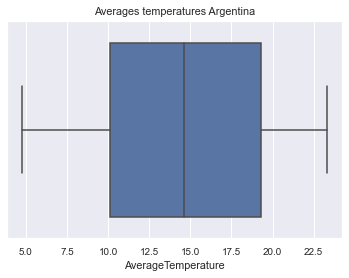

In [299]:
plt.title("Averages temperatures Argentina")
sns.boxplot(data=Argentina, x="AverageTemperature")

<AxesSubplot:title={'center':'Averages temperatures Argentina'}, xlabel='AverageTemperature'>

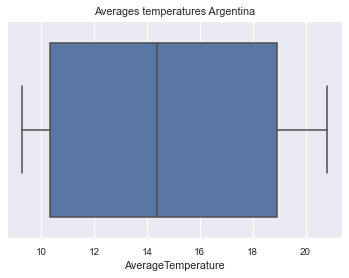

In [300]:
plt.title("Averages temperatures Argentina")
sns.boxplot(data=Argentina_groupby, x="AverageTemperature")

### Scalado

<AxesSubplot:ylabel='Frequency'>

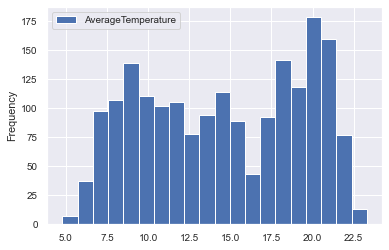

In [301]:
Argentina[['AverageTemperature']].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

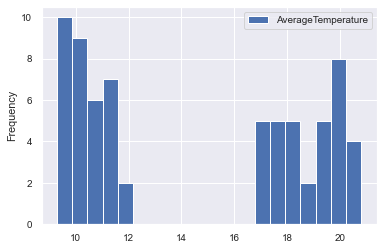

In [302]:
Argentina_groupby[['AverageTemperature']].plot.hist(bins=20)

## `New_Zealand`

In [303]:
numericas = New_Zealand.select_dtypes(exclude=['object']).columns
numericas

Index(['index', 'dt', 'AverageTemperature', 'AverageTemperatureUncertainty',
       'month', 'year'],
      dtype='object')

### BoxPlot: identificando outliers y la concentracion de los datos

<AxesSubplot:title={'center':'Averages temperatures Nueva Zelanda'}, xlabel='AverageTemperature'>

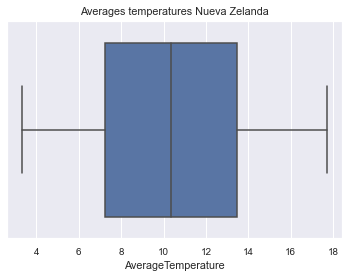

In [304]:
plt.title("Averages temperatures Nueva Zelanda")
sns.boxplot(data=New_Zealand, x="AverageTemperature")

<AxesSubplot:title={'center':'Averages temperatures Nueva Zelanda'}, xlabel='AverageTemperature'>

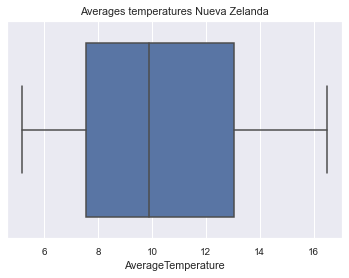

In [305]:
plt.title("Averages temperatures Nueva Zelanda")
sns.boxplot(data=New_Zealand_groupby, x="AverageTemperature")

### Scalado

<AxesSubplot:ylabel='Frequency'>

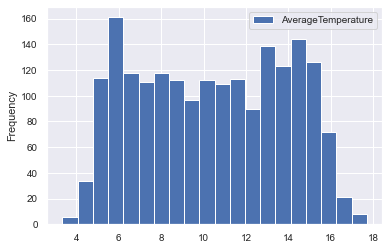

In [306]:
New_Zealand[['AverageTemperature']].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

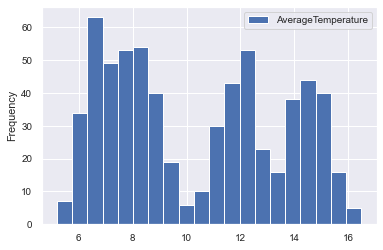

In [307]:
New_Zealand_groupby[['AverageTemperature']].plot.hist(bins=20)

## `Denmark`

In [308]:
numericas = Denmark.select_dtypes(exclude=['object']).columns
numericas

Index(['index', 'dt', 'AverageTemperature', 'AverageTemperatureUncertainty',
       'month', 'year'],
      dtype='object')

### BoxPlot: identificando outliers y la concentracion de los datos

<AxesSubplot:title={'center':'Averages temperatures Denmark'}, xlabel='AverageTemperature'>

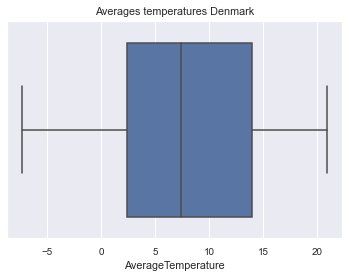

In [309]:
plt.title("Averages temperatures Denmark")
sns.boxplot(data=Denmark, x="AverageTemperature")

<AxesSubplot:title={'center':'Averages temperatures Denmark'}, xlabel='AverageTemperature'>

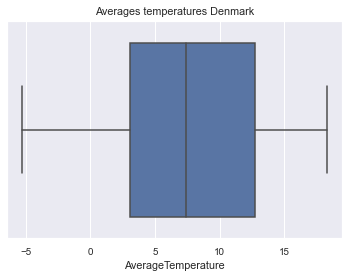

In [310]:
plt.title("Averages temperatures Denmark")
sns.boxplot(data=Denmark_groupby, x="AverageTemperature")

### Scalado

<AxesSubplot:ylabel='Frequency'>

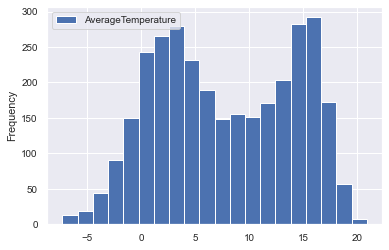

In [311]:
Denmark[['AverageTemperature']].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

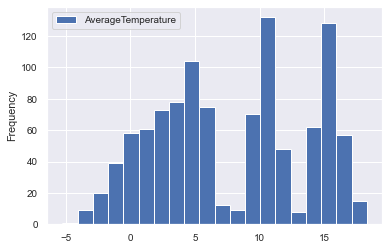

In [312]:
Denmark_groupby[['AverageTemperature']].plot.hist(bins=20)

## `India`

In [313]:
numericas = India.select_dtypes(exclude=['object']).columns
numericas

Index(['index', 'dt', 'AverageTemperature', 'AverageTemperatureUncertainty',
       'month', 'year'],
      dtype='object')

### BoxPlot: identificando outliers y la concentracion de los datos

<AxesSubplot:title={'center':'Averages temperatures India'}, xlabel='AverageTemperature'>

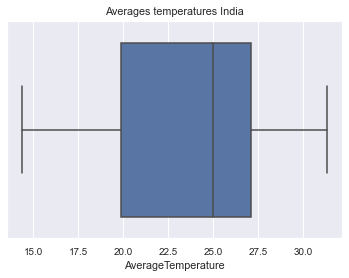

In [314]:
plt.title("Averages temperatures India")
sns.boxplot(data=India, x="AverageTemperature")

<AxesSubplot:title={'center':'Averages temperatures India'}, xlabel='AverageTemperature'>

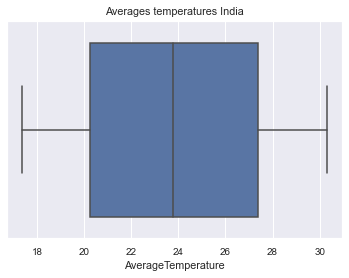

In [315]:
plt.title("Averages temperatures India")
sns.boxplot(data=India_groupby, x="AverageTemperature")

### Scalado

<AxesSubplot:ylabel='Frequency'>

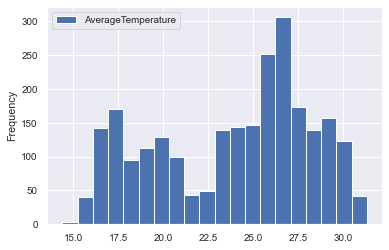

In [316]:
India[['AverageTemperature']].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

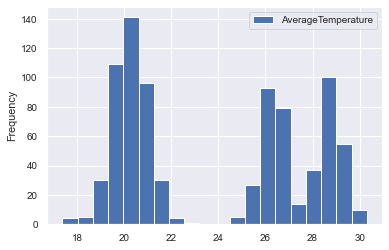

In [317]:
India_groupby[['AverageTemperature']].plot.hist(bins=20)

In [318]:
# no hacemos escalado

# Gráficos del dataset en general y comparacion entre paises

In [319]:
countries = np.unique(country_nonas['Country'])

mean_temp = []
for country in countries:
    mean_temp.append(country_nonas[country_nonas['Country'] == 
                                               country]['AverageTemperature'].mean())

In [320]:
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

/Users/ginacatanese/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



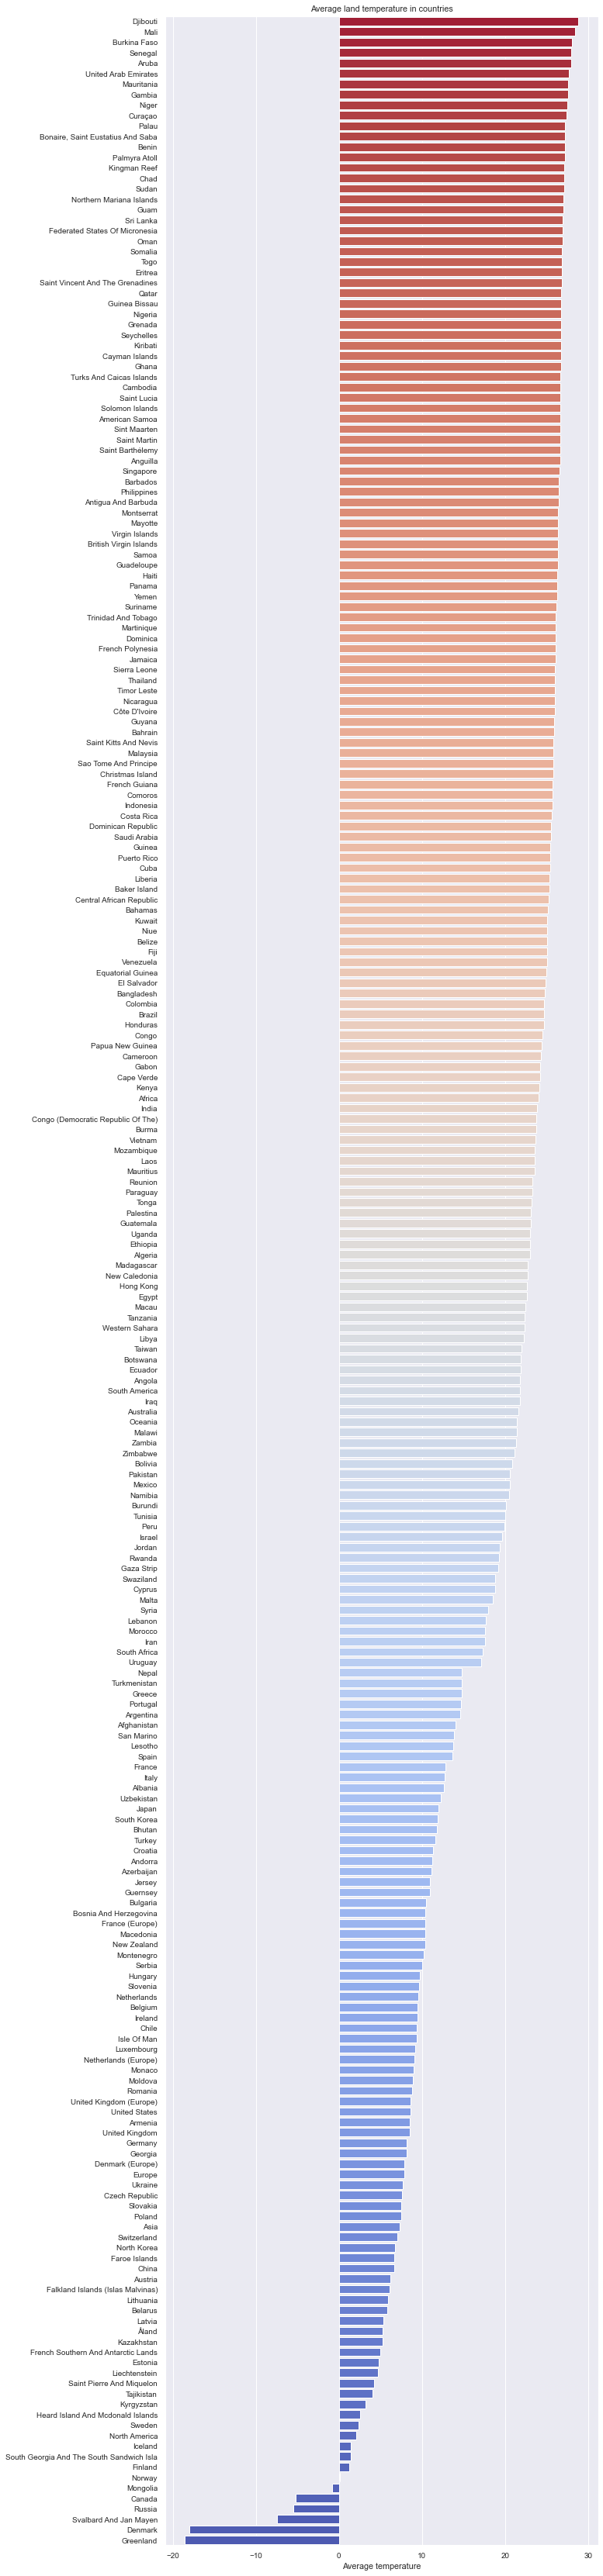

In [321]:
mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), 
                                                             reverse = True)))
sns.set(font_scale=0.9) 
f, ax = plt.subplots(figsize=(10, 60))
colors_cw = sns.color_palette('coolwarm', len(countries))
sns.barplot(mean_temp_bar, countries_bar, palette = colors_cw[::-1])
Text = ax.set(xlabel='Average temperature', title='Average land temperature in countries')

In [322]:
# Creating the dataset - using copy
land_avg = global_temperatures_nonas.groupby('year')['LandAverageTemperature', 'LandAverageTemperatureUncertainty'].mean().reset_index()

# Creating the graph
fig = go.Figure()
fig.update_layout(title="Land Average Temperature: 1850-2015", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='tan')
fig.update_yaxes(showline=True, linewidth=1, linecolor='tan')

fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(128, 199, 199)'))

fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperatureUncertainty'], mode = 'lines',
                        name = 'Land Avg Temp Error', marker_color = 'rgb(107,223,1)'))

/var/folders/ym/zfm3jg1d35731g8kj0npkkp40000gn/T/ipykernel_75373/2845139458.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Subieron las `temperaturas promedio de la tierra` y disminuyo la `uncertainty` , es decir el error. De 0,91 a 0,09. Podemos pensarlo en porcentaje, que bajo casi un 82% el error

## Hemisferio Sur
#### Filtramos para quedarnos con un dataset que solo tenga 2 años y poder comparar como aumento o dismuyo la temperatura
- Comparamos Argentina y Nueva Zelanda individualmente
- Argentina vs New Zealand

### `Argentina`

In [323]:
Argentina_first = Argentina.loc[(Argentina['year'] >= 1956) & (Argentina['year'] <= 1956)]
Argentina_second = Argentina.loc[(Argentina['year'] >= 2010) & (Argentina['year'] <= 2010)]
Argentina_first

,index,dt,AverageTemperature,AverageTemperatureUncertainty,Country,month,estaciones_sur,year,decada
26674,26674,1956-01-01,19.412,0.265,Argentina,1,verano,1956,1950
26675,26675,1956-02-01,19.661,0.189,Argentina,2,verano,1956,1950
26676,26676,1956-03-01,17.919,0.247,Argentina,3,verano,1956,1950
26677,26677,1956-04-01,12.484,0.249,Argentina,4,otoño,1956,1950
26678,26678,1956-05-01,8.388,0.253,Argentina,5,otoño,1956,1950
26679,26679,1956-06-01,7.392,0.200,Argentina,6,otoño,1956,1950
26680,26680,1956-07-01,8.419,0.187,Argentina,7,invierno,1956,1950
26681,26681,1956-08-01,9.316,0.203,Argentina,8,invierno,1956,1950
26682,26682,1956-09-01,11.836,0.234,Argentina,9,invierno,1956,1950
26683,26683,1956-10-01,14.911,0.215,Argentina,10,primavera,1956,1950


In [324]:
Argentina_second

,index,dt,AverageTemperature,AverageTemperatureUncertainty,Country,month,estaciones_sur,year,decada
27322,27322,2010-01-01,22.422,0.200,Argentina,1,verano,2010,2010
27323,27323,2010-02-01,20.858,0.233,Argentina,2,verano,2010,2010
27324,27324,2010-03-01,19.867,0.210,Argentina,3,verano,2010,2010
27325,27325,2010-04-01,14.293,0.222,Argentina,4,otoño,2010,2010
27326,27326,2010-05-01,10.894,0.196,Argentina,5,otoño,2010,2010
27327,27327,2010-06-01,8.766,0.188,Argentina,6,otoño,2010,2010
27328,27328,2010-07-01,6.959,0.260,Argentina,7,invierno,2010,2010
27329,27329,2010-08-01,8.996,0.244,Argentina,8,invierno,2010,2010
27330,27330,2010-09-01,12.671,0.123,Argentina,9,invierno,2010,2010
27331,27331,2010-10-01,15.529,0.176,Argentina,10,primavera,2010,2010


In [325]:
Argentina_first = Argentina_first.set_index(['month'])
Argentina_second = Argentina_second.set_index(['month'])

In [326]:
Argentina_years_comp = pd.DataFrame({'AverageTemperature1956': Argentina_first["AverageTemperature"], 'AverageTemperature2010': Argentina_second["AverageTemperature"]})
Argentina_years_comp


,AverageTemperature1956,AverageTemperature2010
month,,
1,19.412,22.422
2,19.661,20.858
3,17.919,19.867
4,12.484,14.293
5,8.388,10.894
6,7.392,8.766
7,8.419,6.959
8,9.316,8.996
9,11.836,12.671


<AxesSubplot:title={'center':'Argentina Temperatures 1956 and 2010'}, xlabel='Months', ylabel='Temperatures'>

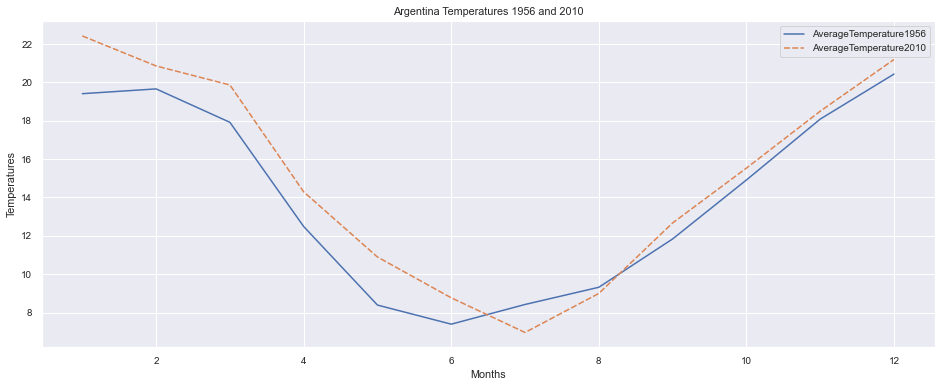

In [327]:
plt.figure(figsize=(16,6))
plt.title("Argentina Temperatures 1956 and 2010")
plt.xlabel("Months")
plt.ylabel("Temperatures")
sns.lineplot(data=Argentina_years_comp)

### `New_Zealand`

In [328]:
New_Zealand_first = New_Zealand.loc[(New_Zealand['year'] >= 1956) & (New_Zealand['year'] <= 1956)]
New_Zealand_second = New_Zealand.loc[(New_Zealand['year'] >= 2010) & (New_Zealand['year'] <= 2010)]
New_Zealand_first

,index,dt,AverageTemperature,AverageTemperatureUncertainty,Country,month,estaciones_sur,year
373659,373659,1956-01-01,17.391,0.325,New Zealand,1,verano,1956
373660,373660,1956-02-01,15.446,0.372,New Zealand,2,verano,1956
373661,373661,1956-03-01,13.208,0.311,New Zealand,3,verano,1956
373662,373662,1956-04-01,13.599,0.581,New Zealand,4,otoño,1956
373663,373663,1956-05-01,9.028,0.482,New Zealand,5,otoño,1956
373664,373664,1956-06-01,7.255,0.223,New Zealand,6,otoño,1956
373665,373665,1956-07-01,5.739,0.320,New Zealand,7,invierno,1956
373666,373666,1956-08-01,6.430,0.338,New Zealand,8,invierno,1956
373667,373667,1956-09-01,8.797,0.406,New Zealand,9,invierno,1956
373668,373668,1956-10-01,10.815,0.331,New Zealand,10,primavera,1956


In [329]:
New_Zealand_second

,index,dt,AverageTemperature,AverageTemperatureUncertainty,Country,month,estaciones_sur,year
374307,374307,2010-01-01,15.219,0.159,New Zealand,1,verano,2010
374308,374308,2010-02-01,16.444,0.230,New Zealand,2,verano,2010
374309,374309,2010-03-01,14.403,0.340,New Zealand,3,verano,2010
374310,374310,2010-04-01,12.190,0.124,New Zealand,4,otoño,2010
374311,374311,2010-05-01,9.300,0.331,New Zealand,5,otoño,2010
374312,374312,2010-06-01,6.663,0.210,New Zealand,6,otoño,2010
374313,374313,2010-07-01,5.816,0.157,New Zealand,7,invierno,2010
374314,374314,2010-08-01,7.754,0.233,New Zealand,8,invierno,2010
374315,374315,2010-09-01,9.191,0.227,New Zealand,9,invierno,2010
374316,374316,2010-10-01,10.258,0.203,New Zealand,10,primavera,2010


In [330]:
New_Zealand_first = New_Zealand_first.set_index(['month'])
New_Zealand_second = New_Zealand_second.set_index(['month'])

In [331]:
New_Zealand_years_comp = pd.DataFrame({'AverageTemperature1956': New_Zealand_first["AverageTemperature"], 'AverageTemperature2010': New_Zealand_second["AverageTemperature"]})
New_Zealand_years_comp


,AverageTemperature1956,AverageTemperature2010
month,,
1,17.391,15.219
2,15.446,16.444
3,13.208,14.403
4,13.599,12.190
5,9.028,9.300
6,7.255,6.663
7,5.739,5.816
8,6.430,7.754
9,8.797,9.191


<AxesSubplot:title={'center':'New Zealand Temperatures 1956 and 2010'}, xlabel='Months', ylabel='Temperatures'>

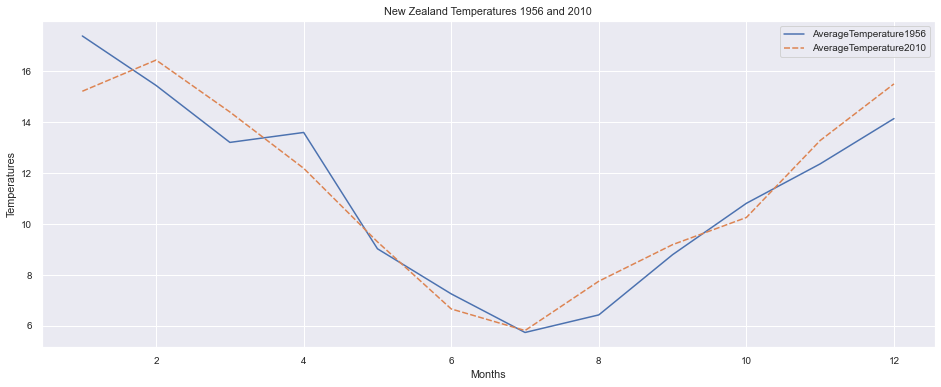

In [332]:
plt.figure(figsize=(16,6))
plt.title("New Zealand Temperatures 1956 and 2010")
plt.xlabel("Months")
plt.ylabel("Temperatures")
sns.lineplot(data=New_Zealand_years_comp)

### `Argentina` vs `New_Zealand`

In [333]:
Arg_vs_Nz = pd.merge(Argentina_years_comp, New_Zealand_years_comp, on='month', suffixes=('_Argentina', '_New_Zealand'))

In [334]:
Arg_vs_Nz

,AverageTemperature1956_Argentina,AverageTemperature2010_Argentina,AverageTemperature1956_New_Zealand,AverageTemperature2010_New_Zealand
month,,,,
1,19.412,22.422,17.391,15.219
2,19.661,20.858,15.446,16.444
3,17.919,19.867,13.208,14.403
4,12.484,14.293,13.599,12.190
5,8.388,10.894,9.028,9.300
6,7.392,8.766,7.255,6.663
7,8.419,6.959,5.739,5.816
8,9.316,8.996,6.430,7.754
9,11.836,12.671,8.797,9.191


<AxesSubplot:title={'center':'Argentina vs New Zealand Temperatures 1956 and 2010'}, xlabel='Months', ylabel='Temperatures'>

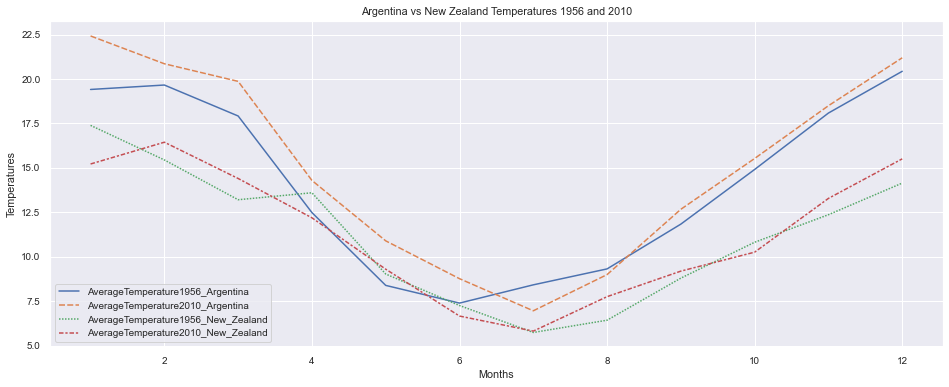

In [335]:
plt.figure(figsize=(16,6))
plt.title("Argentina vs New Zealand Temperatures 1956 and 2010")
plt.xlabel("Months")
plt.ylabel("Temperatures")
sns.lineplot(data=Arg_vs_Nz)

## Hemisferio Norte
#### Filtramos para quedarnos con un dataset que solo tenga 2 años y poder comparar como aumento o dismuyo la temperatura
- Comparamos Denmark e India individualmente
- Denmark vs India

## Modelado
nuestro modelo va a ser de 

In [336]:
Tabla_Paises = country_nonas[(country_nonas['Country'] == 'Argentina') |(country_nonas['Country'] ==  'Denmark (Europe)')|(country_nonas['Country'] == 'New Zealand')|(country_nonas['Country'] == 'India')]
Tabla_Paises


,index,dt,AverageTemperature,AverageTemperatureUncertainty,Country
25466,25466,1855-05-01,10.745,1.499,Argentina
25467,25467,1855-06-01,6.995,2.073,Argentina
25468,25468,1855-07-01,6.901,1.568,Argentina
25469,25469,1855-08-01,9.097,1.412,Argentina
25470,25470,1855-09-01,11.316,1.384,Argentina
...,...,...,...,...,...
374346,374346,2013-04-01,12.279,0.446,New Zealand
374347,374347,2013-05-01,9.006,0.360,New Zealand
374348,374348,2013-06-01,6.463,0.747,New Zealand
374349,374349,2013-07-01,6.751,0.615,New Zealand


### Agregamos un dataset de CO2 para ver si nos ayuda a que el accuracy del modelo sea mayor

In [337]:
Tabla_Paises['dt'] = Tabla_Paises['dt'].map(dt.datetime.toordinal)

/var/folders/ym/zfm3jg1d35731g8kj0npkkp40000gn/T/ipykernel_75373/4285142532.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Hacemos el Heat Map antes del Encoding, ya que Country es una variable categorica.
Este heat map no tiene mucho sentido, ya sabemos que el analisis que vamos a hacer es predecir la temperatura (seria nuestro y) y el año (nuestro x).
Segun el año estimar la. temperatura. 
Ese seria nuestro primer modelo simple, pero vamos a agregar pais como otra variable.

<AxesSubplot:>

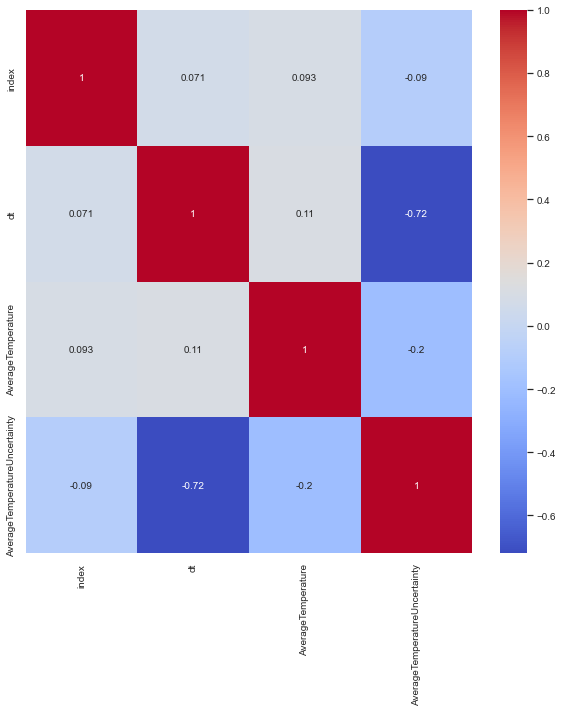

In [338]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    Tabla_Paises.corr(), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10}
)

In [339]:
Tabla_Paises.__delitem__('index')

In [340]:
Tabla_Paises.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
25466,677280,10.745,1.499,Argentina
25467,677311,6.995,2.073,Argentina
25468,677341,6.901,1.568,Argentina
25469,677372,9.097,1.412,Argentina
25470,677403,11.316,1.384,Argentina


In [341]:
Tabla_Paises.reset_index(inplace=True)

In [342]:
Tabla_Paises.__delitem__('index')

In [343]:
Tabla_Paises.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,677280,10.745,1.499,Argentina
1,677311,6.995,2.073,Argentina
2,677341,6.901,1.568,Argentina
3,677372,9.097,1.412,Argentina
4,677403,11.316,1.384,Argentina


# Ecoding de variables categoricas: Paises


In [344]:
from sklearn.preprocessing import OneHotEncoder

Tabla_Paises_ohe = OneHotEncoder(sparse=False) # Instanciate One hot encoder
Tabla_Paises_ohe.fit(Tabla_Paises[['Country']]) # Fit one hot encoder
Tabla_Paises_ohe.categories_

[array(['Argentina', 'Denmark (Europe)', 'India', 'New Zealand'],
       dtype=object)]

In [345]:
Tabla_Paises['Argentina'],Tabla_Paises['Denmark (Europe)'],Tabla_Paises['New Zealand'],Tabla_Paises['India']  = Tabla_Paises_ohe.fit_transform(Tabla_Paises[['Country']]).T # Put encoded columns back in dfframe

Tabla_Paises.drop(columns=['Country'], inplace = True) # Drop original column

Tabla_Paises.head()

/var/folders/ym/zfm3jg1d35731g8kj0npkkp40000gn/T/ipykernel_75373/1467301979.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ym/zfm3jg1d35731g8kj0npkkp40000gn/T/ipykernel_75373/1467301979.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ym/zfm3jg1d35731g8kj0npkkp40000gn/T/ipykernel_75373/1467301979.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,dt,AverageTemperature,AverageTemperatureUncertainty,Argentina,Denmark (Europe),New Zealand,India
0,677280,10.745,1.499,1.0,0.0,0.0,0.0
1,677311,6.995,2.073,1.0,0.0,0.0,0.0
2,677341,6.901,1.568,1.0,0.0,0.0,0.0
3,677372,9.097,1.412,1.0,0.0,0.0,0.0
4,677403,11.316,1.384,1.0,0.0,0.0,0.0


# Modelado
Para armar nuestro modelo, primero tenemos que idetificar si lo conveniente es hacer una regresion o una clasificacion.

Como lo que buscamos es con el conjunto de datos poder estimar cual va a ser la temperatura en los próximos años, lo mas conveniente es usar un modelo de `Regresion Lineal` 

En primer lugar, con los registros que ya tenemos, podemos predecir la temperatura en los próximos años. En ese caso seria una `regresion lineal simple`.

Pero to spice things up, vamos a agregar un dataset de las `emisiones de dioxido de carbono`.

Vamos a comparar estos dos modelos para ver si es mas accurate el modelo en donde tenemos esta variable extra, o si con solo los datos que ya tenemos, podemos tener una buena prediccion.



In [346]:
# Define X and y
y = Tabla_Paises['AverageTemperature']
X = Tabla_Paises.drop(columns=['AverageTemperature'])

In [347]:
#Train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.30, random_state= 10)

In [348]:
from sklearn.linear_model import LinearRegression # explicit class import from module
model = LinearRegression()

# Train the model on the data
model.fit(X_train, y_train)

LinearRegression()

In [349]:
y_pred = model.predict(X_test)
print('Accuracy on test set: ', model.score(X_test, y_test))

Accuracy on test set:  0.6181619732819532


In [350]:
model.coef_

array([ 8.01483561e-07, -3.14540513e-01,  3.34249239e-01, -6.13279327e+00,
        9.62083445e+00, -3.82229042e+00])

In [351]:
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import math

#MSE
print(mean_squared_error(y_test,y_pred))

#RMSE
print(math.sqrt(mean_squared_error(y_test,y_pred)))

#MAE
print(mean_absolute_error(y_test,y_pred))

#MAPE
print(mean_absolute_percentage_error(y_test,y_pred))

#R2
print(r2_score(y_test,y_pred))

25.564645282376837
5.056149254361152
4.343713530013842
2.6497073273892626
0.6181619732819532


## ¿Mejoramos el modelo si sacamos AverageTemperatureUncertainty? 

In [352]:
y = Tabla_Paises['AverageTemperature']
X = Tabla_Paises.drop(columns=['AverageTemperature', 'AverageTemperatureUncertainty'])

In [353]:
#Train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.30, random_state= 10)

In [354]:
model2 = LinearRegression()

# Train the model on the data
model2.fit(X_train, y_train)

LinearRegression()

In [355]:
y_pred = model2.predict(X_test)
print('Accuracy on test set: ', model2.score(X_test, y_test))

Accuracy on test set:  0.6152966616164383


### No mejoramos el modelo, por el contrario, empeoro. 
¿Si agregamos otras variables, que esten en otro dataset?

## Predecimos hasta ahora, con el modelo 1. 

In [356]:
X.tail()

,dt,Argentina,Denmark (Europe),New Zealand,India
9497,734959,0.0,0.0,0.0,1.0
9498,734989,0.0,0.0,0.0,1.0
9499,735020,0.0,0.0,0.0,1.0
9500,735050,0.0,0.0,0.0,1.0
9501,735081,0.0,0.0,0.0,1.0


In [357]:
#Averiguar en que momento es
prediction = model.predict([[835081, 1.2, 1, 0, 0, 0]])
prediction

/Users/ginacatanese/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([14.51832731])

In [358]:
from datetime import datetime
fecha = datetime.fromordinal(835081)
fecha

datetime.datetime(2287, 5, 17, 0, 0)

## Agregamos a la emision de CO2 como nueva variable independiente. 

In [359]:
#hacer columna año mes de co2 y tabla_paises 

Graficos:

(0.0, 33.2861392769299)

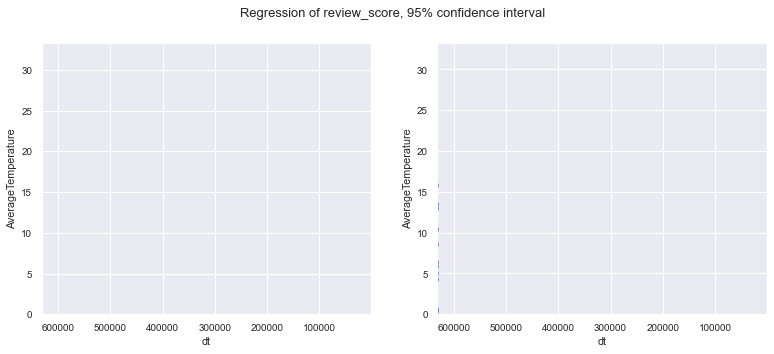

In [360]:
#grafico de regrsion lineal
plt.figure(figsize=(13,5))
plt.suptitle('Regression of review_score, 95% confidence interval')
plt.subplot(1,2,1)
sns.regplot(x = Tabla_Paises.dt, y= Tabla_Paises.AverageTemperature, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = Tabla_Paises.dt, y= Tabla_Paises.AverageTemperature, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

ValueError: x and y must be the same size

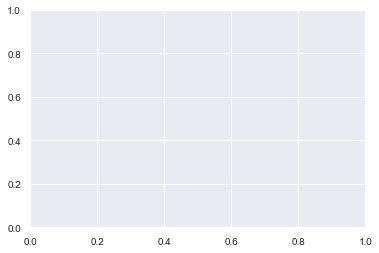

In [361]:
Tabla_Paises = Tabla_Paises[['AverageTemperature','dt']]
plt.scatter(X, y, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Minutes Played')
plt.ylabel('Rating')
plt.show()